# Data Science Challenge: Trips!

### Workday ID (C973774) NH

This coding challenge is designed to test your skill and intuition about real world data. For the challenge, we will use datacollected by the New York City Taxi and Limousine commission about “Green” Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan. We will use the data from September 2015. We are using NYC Taxi and Limousine trip record data: (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).

In [157]:
#Import modules
import pandas as pd
import os
import scipy.stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import robust_scale
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn import model_selection, preprocessing, metrics


In [3]:
# current directory
os.getcwd()

'/home/nestorghh'

# Question 1: 
#Programmatically download and load into your favorite analytical tool the trip data for September 2015.
#Report how many rows and columns of data you have loaded.

In [4]:
# Programmatically download and load into your favorite analytical tool the trip data for September 2015.
df=pd.read_csv('green_tripdata_2015-09.csv') # use pandas module to import the sep-2015 green-taxi data set
df.head(6)   # Inspect data set by printing first 6 rows

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
5,2,2015-09-01 00:00:39,2015-09-01 00:05:20,N,1,-73.945297,40.808186,-73.937668,40.821198,1,...,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,1,1.0


In [5]:
# Report how many rows and columns of data you have loaded.
df.shape

(1494926, 21)

We have 1,494,926 instances and 21 columns.

In [6]:
# check data type for each column
df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object

# Features
VendorID: A code indicating the LPEP provider that provided the record. 
          
          1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
          
lpep_pickup_datetime: The date and time when the meter was engaged.

lpep_dropoff_datetime: The date and time when the meter was disengaged. 

Passenger_count: The number of passengers in the vehicle.

Trip_distance: The elapsed trip distance in miles reported by the taximeter.

PULocationID: TLC Taxi Zone in which the taximeter was engaged.

DOLocationID: TLC Taxi Zone in which the taximeter was disengaged

RateCodeID: The final rate code in effect at the end of the trip. 
    
    1= Standard rate
    2=JFK
    3=Newark
    4=Nassau or Westchester
    5=Negotiated fare
    6=Group ride

Store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

    Y= store and forward trip
    N= not a store and forward trip
    
Payment_type: A numeric code signifying how the passenger paid for the trip.

    1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip

Fare_amount: The time-and-distance fare calculated by the meter.

Extra: Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.

MTA_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

Improvement_surcharge: $0.30 improvement surcharge assessed on hailed trips at the flag
drop. The improvement surcharge began being levied in 2015.

Tip_amount: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included.

Tolls_amount: Total amount of all tolls paid in trip.

Total_amount: The total amount charged to passengers. Does not include cash tips.

Trip_type: A code indicating whether the trip was a street-hail or a dispatch
that is automatically assigned based on the metered rate in use but
can be altered by the driver.

    1= Street-hail
    2= Dispatch



# Question 2: 
Plot a histogram of the number of the trip distance (“Trip Distance”).

Report any structure you find and any hypotheses you have about that structure.

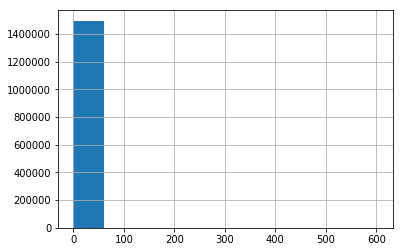

In [7]:
#plot histogram
%matplotlib inline 
df['Trip_distance'].hist()

In [8]:
#stats
df['Trip_distance'].describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

In [9]:
# sort by trip_distance in descending order
df.sort_values(by=['Trip_distance'],ascending=False)['Trip_distance'].head(10)

1321961    603.10
478080     246.28
944537     134.70
516757     120.13
1432692    112.60
1416994    112.60
1282594    108.62
1457965    108.50
1077032    105.65
885097     100.74
Name: Trip_distance, dtype: float64

In [10]:
# remove instances that are more than 4 standard deviation away
d=df[(df.Trip_distance>=-12) & (df.Trip_distance<=12)]

In [11]:
d.shape
#d['Trip_distance'].describe()

(1464289, 21)

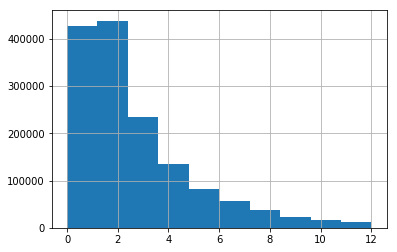

In [12]:
d['Trip_distance'].hist() # do histogram again

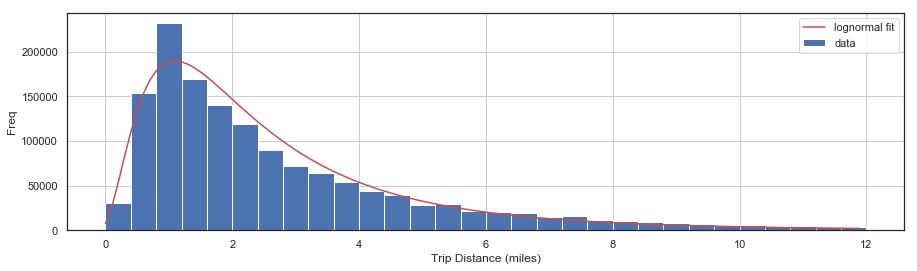

In [246]:
# It seems to follow sort of an exponential distribution (Lots of short trips, and a few long trips). 

scatter, loc, mean = scipy.stats.lognorm.fit( d['Trip_distance'], scale = d['Trip_distance'].mean(), loc=0)

fig,ax = plt.subplots(1,figsize = (15,4))

pdf_fitted = scipy.stats.lognorm.pdf(np.arange(0,12,.1),scatter,loc,mean)

d['Trip_distance'].hist(bins=30, ax=ax)
ax.set_xlabel('Trip Distance (miles)')
ax.set_ylabel('Freq')

ax.plot(np.arange(0,12,.1),600000*pdf_fitted,'r') 
ax.legend(['lognormal fit','data'])
plt.show()


We observe that the trip_distance is right-skewed and asymmetrical. It closely follows a log-normal distribution as we see from the plot above (https://en.wikipedia.org/wiki/Log-normal_distribution).  

# Question 3:
Report mean and median trip distance grouped by hour of day.

We’d like to get a rough sense of identifying trips that originate or terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, the average fare, and any other interesting characteristics of these trips.

In [14]:
# create the pickup_hour attribute
d['pickup'] = d['lpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
d['pickup_hour'] = d['pickup'].apply(lambda x: x.hour) 

# create the dropoff_hour attribute
d['dropoff'] = d['Lpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
d['dropoff_hour'] = d['dropoff'].apply(lambda x: x.hour)


/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [15]:
d.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,0.0,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,0.0,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,0.0,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,0.0,NaN,0.3,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0


In [16]:
d.shape

(1464289, 25)

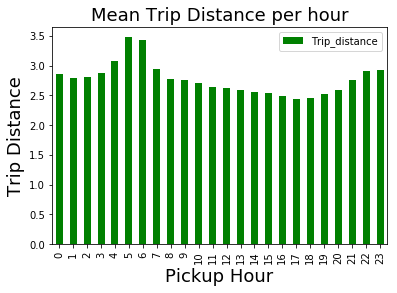

In [17]:
aux = d[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean().plot.bar(color='green')
aux = plt.title('Mean Trip Distance per hour', fontsize = 18)
aux = plt.xlabel('Pickup Hour', fontsize = 18)
aux = plt.ylabel('Trip Distance', fontsize = 18)

In [18]:
# show numerical values
d[['Trip_distance','pickup_hour']].groupby('pickup_hour').mean()

,Trip_distance
pickup_hour,
0,2.862922
1,2.794853
2,2.804221
3,2.878996
4,3.067922
5,3.479835
6,3.435350
7,2.943114
8,2.781780


### Observations:
We observe longer trips early morning (4 till 7 am) and also towards the end of the day (10-11 pm). I conjecture that people tend to travel longer during non-rush hours. 

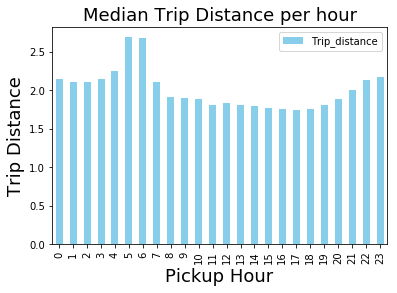

In [19]:
aux = d[['Trip_distance','pickup_hour']].groupby('pickup_hour').median().plot.bar(color='skyblue')
aux = plt.title('Median Trip Distance per hour', fontsize = 18)
aux = plt.xlabel('Pickup Hour', fontsize = 18)
aux = plt.ylabel('Trip Distance', fontsize = 18)

In [20]:
# show numerical values
d[['Trip_distance','pickup_hour']].groupby('pickup_hour').median()

,Trip_distance
pickup_hour,
0,2.15
1,2.10
2,2.10
3,2.15
4,2.25
5,2.69
6,2.68
7,2.10
8,1.91


### Observations:
We observe that the median follows a very similar distribution per hour compared to the mean. It seems passengers take longer trips early morning (4-7 am) and then again at 10-11 pm.

In [21]:
# We’d like to get a rough sense of identifying trips that originate or 
# terminate at one of the NYC area airports. Can you provide a count of how many transactions fit this criteria, 
# the average fare, and any other interesting characteristics of these trips.


# La Guardia : 40.778457, -73.867679
# JFK: 40.641792, -73.777992
# Newark: 40.694337, -74.173603

# Use  the equirectangular distance approximation.

def distance_lat_long(lon1,lat1,lon2,lat2):
    lon1=lon1 * (math.pi / 180)
    lon2=lon2 * (math.pi / 180)
    lat1=lat1 * (math.pi / 180)
    lat2=lat2 * (math.pi / 180)
    R = 6371  # radius of the earth in km
    x = (lon2 - lon1) * math.cos( 0.5*(lat2+lat1) )
    y = lat2 - lat1
    d = R * math.sqrt( x*x + y*y )
    return d # returns distance in kms.


In [22]:
#check that it makes sense. The distance between JFK and La Guardia is about 10.5 miles (16.89 kms)
print(distance_lat_long(-73.867679,40.778457,-73.777992,40.641792))

16.972880739543747


In [23]:
# this function returns the closest airport given lat, long within 2 kilometers.
def get_airport(row):
    if (distance_lat_long(row['Pickup_longitude'],row['Pickup_latitude'], -73.867679, 40.778457)<=2):
        
        return 'La Guardia' 
    
    if (distance_lat_long(row['Dropoff_longitude'],row['Dropoff_latitude'], -73.867679, 40.778457)<=2):
        
        return 'La Guardia' 
    
    if (distance_lat_long(row['Pickup_longitude'],row['Pickup_latitude'], -73.777992, 40.641792)<=2):
        
        return 'JFK'
    
    if (distance_lat_long(row['Dropoff_longitude'],row['Dropoff_latitude'], -73.777992, 40.641792)<=2):
        
        return 'JFK'
    
    if (distance_lat_long(row['Pickup_longitude'],row['Pickup_latitude'], -74.173603, 40.694337)<=2):
        
        return 'Newark'
    
    if (distance_lat_long(row['Dropoff_longitude'],row['Dropoff_latitude'], -74.173603, 40.694337)<=2):
        
        return 'Newark'
    
    else:
        return 'NOT' # Not an Airport pickup/dropoff

In [24]:
d['Airport'] = d.apply(get_airport, axis=1) 

/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
d.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,Airport
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,NaN,0.0,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,NOT
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,NaN,0.0,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,NOT
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,NaN,0.3,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,NOT
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,NaN,0.3,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0,NOT
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,NaN,0.3,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0,NOT


#### Distribution of new variable AIrport

In [26]:
d['Airport'].value_counts()

NOT           1430596
La Guardia      29379
JFK              4266
Newark             48
Name: Airport, dtype: int64

### Determining if a trip originates or terminates in an airport.

As explained in the distance_lat_long and get_airport functions, we consider trips that are within 2 kilometers (1.24 miles) apart from each airport. We assign the closest airport to such trips.

We observe that following this criterion, 29379 + 4266 + 48= 33693 (2.3 %) trips are airport related.

#### Compute mean on airport related trips

In [27]:
d[d['Airport']!= 'NOT']['Fare_amount'].mean()

19.165900335381245

#### Compute mean on non-airport related trips

In [28]:
d[d['Airport']=='NOT']['Fare_amount'].mean()

11.621906722792524

Let us test if they are statistically significant different. I will perform a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 

In [29]:
scipy.stats.ttest_ind(d[d['Airport']=='NOT']['Fare_amount'],d[d['Airport']!= 'NOT']['Fare_amount'])

Ttest_indResult(statistic=-165.44981874619316, pvalue=0.0)

We observe that the p-value=0.0, so we can reject the null hypothesis, i.e, that both distributions have the same mean. Thus, we can safely argue that airport related trips are more expensive than regular trips. This is somehow intuitive since these trips are likely to be longer.

#### Let's check if the number of passengers are statistically different in the two samples (airport vs non-airport trips)

In [30]:
d[d['Airport']!= 'NOT']['Passenger_count'].mean()

1.3827798058943994

In [31]:
d[d['Airport']=='NOT']['Passenger_count'].mean()

1.3692789578609195

In [32]:
scipy.stats.ttest_ind(d[d['Airport']=='NOT']['Passenger_count'],d[d['Airport']!= 'NOT']['Passenger_count'])

Ttest_indResult(statistic=-2.3584557424391495, pvalue=0.01835127851763203)

We cannot reject the null hypothesis. There does not seem to be differences in the number of passengers for the two types of trips.

In [33]:
d['lpep_pickup_datetime'] = pd.to_datetime(d.lpep_pickup_datetime) # convert to datetime object
d.loc[:, 'weekday'] = d['lpep_pickup_datetime'].dt.dayofweek



/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/nestorghh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/nestorghh/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [34]:
#d_airport[d_airport['Fare_amount']<0]

grouped_df = d[d['Airport']!='NOT'].groupby(['Airport','weekday'])['Fare_amount'].aggregate(np.mean).reset_index() 

grouped_df.head()


,Airport,weekday,Fare_amount
0,JFK,0,28.803119
1,JFK,1,28.023485
2,JFK,2,28.322021
3,JFK,3,28.544160
4,JFK,4,28.222973


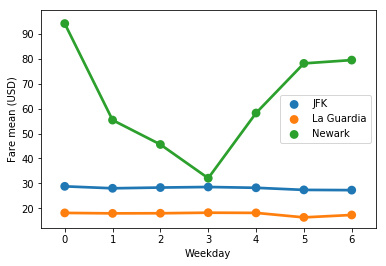

In [35]:
sns.pointplot(grouped_df.weekday.values, grouped_df.Fare_amount.values, grouped_df.Airport.values, alpha=0.8)
plt.ylabel('Fare mean (USD)')
plt.xlabel('Weekday')
plt.xticks(rotation='horizontal')
plt.show()


We observe that trips originated or terminated in Newark are more expensive across the week than trips to/from La Guardia and JKF. We also notice that the fare amount for JFK trips are higher than La Guardia's. 

In [36]:
d_airport = d[d['Airport']!= 'NOT']


/home/nestorghh/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Density')

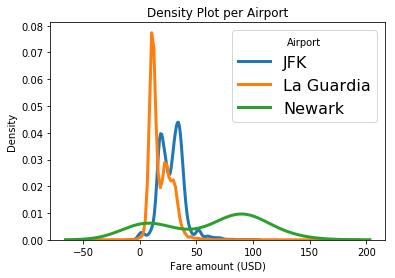

In [37]:
airports=['JFK', 'La Guardia', 'Newark']

for a in airports:
    subset = d_airport[d_airport['Airport'] == a]
    
    # Draw the density plot
    sns.distplot(subset['Fare_amount'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = a)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airport')
plt.title('Density Plot per Airport')
plt.xlabel('Fare amount (USD)')
plt.ylabel('Density')


In [39]:
d_airport[d_airport['Fare_amount']<0]['Fare_amount'] #c

21886      -3.0
26918      -2.5
26967      -2.5
39638      -5.5
90915     -45.0
475801     -4.5
511511     -2.5
735453     -4.5
746643     -5.5
1152808    -2.5
1166636    -4.0
1207979    -2.5
Name: Fare_amount, dtype: float64

We note that there are 12 instances that contain a negative fare amount. However, we observe that the three airports show different fare_amount distributions. 

## Question 4

Build a derived variable for tip as a percentage of the total fare.

Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.

In [40]:
# create the new variable tip_percentage
d['tip_percentage'] = d['Tip_amount']/d['Total_amount']

/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,Airport,weekday,tip_percentage
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,9.75,1,2.0,2015-09-01 00:02:34,0,2015-09-01 00:02:38,0,NOT,1,0.200000
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.00,1,2.0,2015-09-01 00:04:20,0,2015-09-01 00:04:24,0,NOT,1,0.000000
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,5.80,1,1.0,2015-09-01 00:01:50,0,2015-09-01 00:04:24,0,NOT,1,0.086207
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,6.30,2,1.0,2015-09-01 00:02:36,0,2015-09-01 00:06:42,0,NOT,1,0.000000
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,6.30,2,1.0,2015-09-01 00:00:14,0,2015-09-01 00:04:20,0,NOT,1,0.000000


In [42]:
d['tip_percentage'].describe()

count    1.460212e+06
mean     6.618702e-02
std      8.871513e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.666667e-01
max      1.000000e+00
Name: tip_percentage, dtype: float64

In [44]:
d['Payment_type'].value_counts() # check distribution by payment_type

2    772188
1    682350
3      5379
4      4301
5        71
Name: Payment_type, dtype: int64

In [47]:
# compute tip_percentage mean by payment_type
grouped_df = d.groupby(['Payment_type'])['tip_percentage'].aggregate(np.mean).reset_index()
grouped_df

,Payment_type,tip_percentage
0,1,0.141686
1,2,0.000001
2,3,0.002101
3,4,0.000278
4,5,0.000000


According to the variable description (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf), cash tips (2) are not included, 3 means not charge, 4 stands for trips in dispute,and 5 is unknown. Given this, I'll only consider trips that were paid using credit cards. 

In [50]:
d['RateCodeID'].value_counts() # check distribution by RateCodeID

1     1428970
5       32215
2        2040
3         611
4         411
6          36
99          6
Name: RateCodeID, dtype: int64

In [49]:
d[d['RateCodeID']==99] # see cases where ratecodeid is 99. We do not have this category in the variable 
#description. I will remove such records.

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Total_amount,Payment_type,Trip_type,pickup,pickup_hour,dropoff,dropoff_hour,Airport,weekday,tip_percentage
15736,1,2015-09-01 12:20:32,2015-09-01 12:21:10,N,99,-73.906456,40.871605,-73.906464,40.871605,1,...,0.00,2,1.0,2015-09-01 12:20:32,12,2015-09-01 12:21:10,12,NOT,1,NaN
658365,1,2015-09-13 21:30:27,2015-09-13 21:30:27,N,99,-73.950455,40.670223,0.000000,0.000000,1,...,0.00,2,1.0,2015-09-13 21:30:27,21,2015-09-13 21:30:27,21,NOT,6,NaN
984680,1,2015-09-20 05:49:23,2015-09-20 09:49:23,Y,99,-73.932220,40.800476,0.000000,0.000000,0,...,17.30,1,NaN,2015-09-20 05:49:23,5,2015-09-20 09:49:23,9,NOT,6,0.0
985599,1,2015-09-20 06:27:40,2015-09-20 10:27:40,Y,99,-73.899170,40.746098,0.000000,0.000000,0,...,12.35,1,NaN,2015-09-20 06:27:40,6,2015-09-20 10:27:40,10,NOT,6,0.0
985620,1,2015-09-20 06:22:12,2015-09-20 10:22:12,Y,99,-73.957703,40.717789,0.000000,0.000000,0,...,23.15,1,NaN,2015-09-20 06:22:12,6,2015-09-20 10:22:12,10,NOT,6,0.0
1070054,1,2015-09-22 06:43:33,2015-09-22 10:43:33,Y,99,-73.928520,40.692528,0.000000,0.000000,0,...,20.30,3,NaN,2015-09-22 06:43:33,6,2015-09-22 10:43:33,10,NOT,1,0.0


In [52]:
# compute tip mean by ratecodeid
grouped_df = d.groupby(['RateCodeID'])['tip_percentage'].aggregate(np.mean).reset_index()
grouped_df

,RateCodeID,tip_percentage
0,1,0.067026
1,2,0.010176
2,3,0.019255
3,4,0.056382
4,5,0.029627
5,6,0.000000
6,99,0.000000


In [53]:
# compute tip mean by airport variable.
grouped_df = d.groupby(['Airport'])['tip_percentage'].aggregate(np.mean).reset_index()
grouped_df

,Airport,tip_percentage
0,JFK,0.082721
1,La Guardia,0.086131
2,NOT,0.065726
3,Newark,0.129221


Trips from/to JFK and La Guardia show a higher tip percentage compared to non-airport and Newark trips.

In [72]:
# See which columns contain Null values
d.isna().any()

VendorID                 False
lpep_pickup_datetime     False
Lpep_dropoff_datetime    False
Store_and_fwd_flag       False
RateCodeID               False
Pickup_longitude         False
Pickup_latitude          False
Dropoff_longitude        False
Dropoff_latitude         False
Passenger_count          False
Trip_distance            False
Fare_amount              False
Extra                    False
MTA_tax                  False
Tip_amount               False
Tolls_amount             False
Ehail_fee                 True
improvement_surcharge    False
Total_amount             False
Payment_type             False
Trip_type                 True
pickup                   False
pickup_hour              False
dropoff                  False
dropoff_hour             False
Airport                  False
weekday                  False
tip_percentage            True
dtype: bool

In [73]:
d[d['Ehail_fee'].isnull()].shape 

(1464289, 28)

This variable contains lots of null values and will be discarded in the predictive model.

In [74]:
d[d['tip_percentage'].isnull()].shape

(4077, 28)

4077 instances have NaN value as tip_percentage. 

In [55]:
d.isna().any()

VendorID                 False
lpep_pickup_datetime     False
Lpep_dropoff_datetime    False
Store_and_fwd_flag       False
RateCodeID               False
Pickup_longitude         False
Pickup_latitude          False
Dropoff_longitude        False
Dropoff_latitude         False
Passenger_count          False
Trip_distance            False
Fare_amount              False
Extra                    False
MTA_tax                  False
Tip_amount               False
Tolls_amount             False
Ehail_fee                 True
improvement_surcharge    False
Total_amount             False
Payment_type             False
Trip_type                 True
pickup                   False
pickup_hour              False
dropoff                  False
dropoff_hour             False
Airport                  False
weekday                  False
tip_percentage            True
dtype: bool

In [82]:
d.loc[d['Total_amount']==0,['Payment_type','Total_amount']]['Payment_type'].value_counts()

2    3502
1     320
3     213
4      40
5       2
Name: Payment_type, dtype: int64

In [83]:
d.loc[d['Total_amount']==0,['RateCodeID','Total_amount']]['RateCodeID'].value_counts()

5     3488
1      566
2       18
99       2
3        2
4        1
Name: RateCodeID, dtype: int64

In [96]:
d = d.rename(columns={ d.columns[20]: "Trip_type" })# for some reason, pandas imported this wrong and was giving me key error.


In [101]:
d = d[~d['Trip_type'].isnull()] # remove 4 rows that have null values for trip_type

In [102]:
d['Trip_type']=d['Trip_type'].astype(int) # convert to integer

In [105]:
# compute tip mean by Trip_type variable.
grouped_df = d.groupby(['Trip_type'])['tip_percentage'].aggregate(np.mean).reset_index()
grouped_df

,Trip_type,tip_percentage
0,1,0.066910
1,2,0.029668


Street-hail trips show higher tip percentage compared to dispatch trips.

### Predictive Model

#### Build a predictive model for tip as a percentage of the total fare. Use as much of the data as you like (or all of it). Provide an estimate of performance using an appropriate sample, and show your work.

In [108]:
dm = d[d['Payment_type']==1] # get trips paid using credit cards.

In [109]:
dm.shape

(682347, 28)

In [110]:
dm.drop(['Ehail_fee','RateCodeID','Extra'], axis=1, inplace=True)

/home/nestorghh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [112]:
dm.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'MTA_tax', 'Tip_amount', 'Tolls_amount',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type',
       'pickup', 'pickup_hour', 'dropoff', 'dropoff_hour', 'Airport',
       'weekday', 'tip_percentage'],
      dtype='object')

#### Correlation Matrix

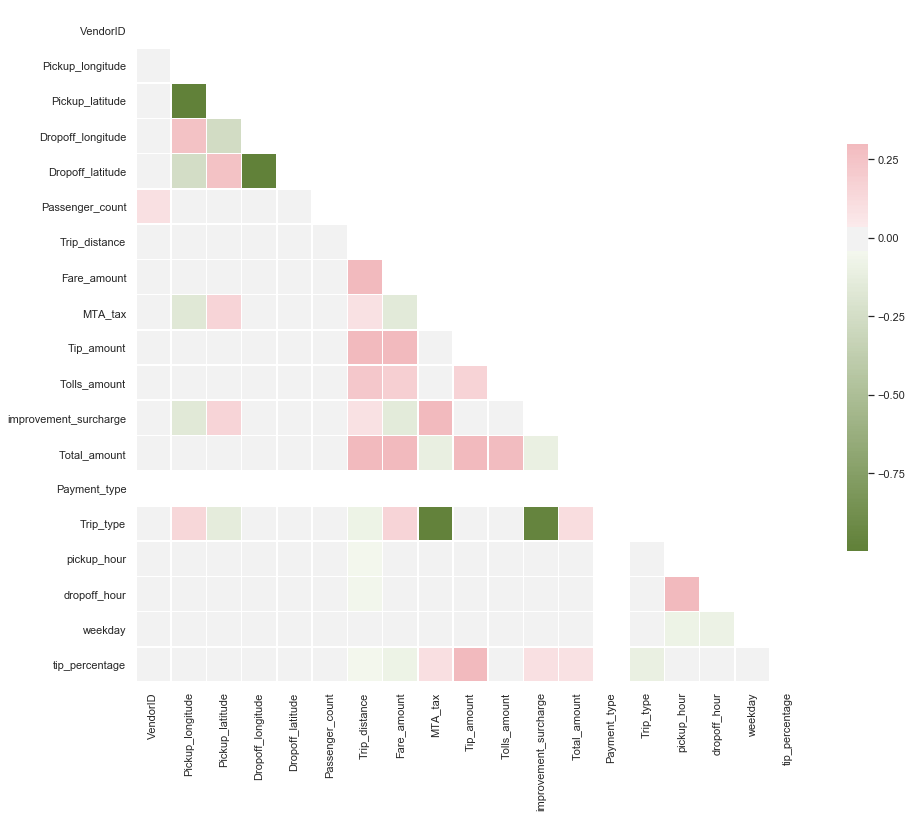

In [115]:
sns.set(style="white")

# Generate a large random dataset
temp3 = dm.copy() # our dataframe

# Compute the correlation matrix
corr = temp3.corr() # corr calculation

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(110, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [116]:
corr

,VendorID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,Fare_amount,MTA_tax,Tip_amount,Tolls_amount,improvement_surcharge,Total_amount,Payment_type,Trip_type,pickup_hour,dropoff_hour,weekday,tip_percentage
VendorID,1.000000,-0.011752,0.014224,-0.009280,0.012737,0.091941,-0.007325,-0.002340,-0.026455,-0.023827,0.006692,-0.019908,-0.007398,NaN,0.026293,0.010869,0.008394,0.002587,-0.034993
Pickup_longitude,-0.011752,1.000000,-0.999229,0.259524,-0.257297,-0.008392,-0.031962,0.005178,-0.167347,0.000966,-0.004713,-0.158031,0.001836,NaN,0.144527,-0.006859,-0.006592,-0.004213,-0.010741
Pickup_latitude,0.014224,-0.999229,1.000000,-0.259012,0.258765,0.007185,0.031062,-0.006339,0.162864,-0.004302,0.006700,0.153705,-0.003613,NaN,-0.140043,0.006361,0.006364,0.001939,0.005448
Dropoff_longitude,-0.009280,0.259524,-0.259012,1.000000,-0.998073,-0.002823,-0.003360,-0.005292,-0.038973,-0.004956,0.000210,-0.037985,-0.006176,NaN,0.000313,-0.002329,-0.002245,-0.000856,-0.002863
Dropoff_latitude,0.012737,-0.257297,0.258765,-0.998073,1.000000,0.001156,0.001144,0.002558,0.031317,-0.000449,0.003443,0.030599,0.002623,NaN,0.007318,0.001009,0.001338,-0.002612,-0.006019
Passenger_count,0.091941,-0.008392,0.007185,-0.002823,0.001156,1.000000,0.010174,0.008124,0.012322,0.010027,0.006365,0.012500,0.010753,NaN,-0.011429,0.010870,0.009347,0.015730,0.009612
Trip_distance,-0.007325,-0.031962,0.031062,-0.003360,0.001144,0.010174,1.000000,0.819521,0.084021,0.431921,0.233427,0.082831,0.817453,NaN,-0.081686,-0.046264,-0.054479,0.035445,-0.048016
Fare_amount,-0.002340,0.005178,-0.006339,-0.005292,0.002558,0.008124,0.819521,1.000000,-0.152214,0.453543,0.192615,-0.145975,0.967420,NaN,0.156295,-0.032739,-0.036325,0.017272,-0.081166
MTA_tax,-0.026455,-0.167347,0.162864,-0.038973,0.031317,0.012322,0.084021,-0.152214,1.000000,0.003871,-0.001897,0.966552,-0.112841,NaN,-0.974264,0.029660,0.028513,0.008809,0.103932
Tip_amount,-0.023827,0.000966,-0.004302,-0.004956,-0.000449,0.010027,0.431921,0.453543,0.003871,1.000000,0.163165,0.004477,0.649458,NaN,-0.002341,-0.004535,-0.005881,0.008277,0.609442


#### Split data set to do validation

In [120]:
X = dm # covariates
y = dm.tip_percentage # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print ( " X_train shape is :\n")
print (X_train.shape)
print (" X_test shape is :\n")
print (X_test.shape)

 X_train shape is :

(545877, 25)
 X_test shape is :

(136470, 25)


In [121]:
X_test = X_test.iloc[:, :-1] # exclude the target variable(tip_percentage) from our test data

In [122]:
X_test.drop(['Tip_amount'], axis=1, inplace=True) # this variable is correlated to tip_percentage

In [128]:
null_count_df = X_train.isnull().sum(axis=0).reset_index() # test set
null_count_df.columns = ['col_name', 'null_count']
null_count_df

,col_name,null_count
0,VendorID,0
1,lpep_pickup_datetime,0
2,Lpep_dropoff_datetime,0
3,Store_and_fwd_flag,0
4,Pickup_longitude,0
5,Pickup_latitude,0
6,Dropoff_longitude,0
7,Dropoff_latitude,0
8,Passenger_count,0
9,Trip_distance,0


In [127]:
X_train=X_train[~X_train['tip_percentage'].isnull()]

#### Compute some variables.

In [141]:
X_train.head()

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,Trip_distance,...,pickup_hour,dropoff,dropoff_hour,Airport,weekday,tip_percentage,pickup_day,pickup_month,week_of_year,day_of_week
301699,1,2015-09-07 00:49:43,2015-09-07 00:54:04,0,-73.956497,40.716961,-73.946335,40.724720,1,1.00,...,0,2015-09-07 00:54:04,0,NOT,0,0.150000,7,9,37,0
433403,2,2015-09-10 01:30:39,2015-09-10 01:55:58,0,-73.954811,40.718529,-73.966553,40.710800,1,5.62,...,1,2015-09-10 01:55:58,1,NOT,3,0.084034,10,9,37,3
1172370,2,2015-09-24 17:09:27,2015-09-24 17:24:48,0,-73.944283,40.819691,-73.955078,40.769947,1,5.30,...,17,2015-09-24 17:24:48,17,NOT,3,0.091743,24,9,39,3
1115539,2,2015-09-23 09:30:36,2015-09-23 09:39:40,0,-73.855415,40.839706,-73.850807,40.822289,1,1.58,...,9,2015-09-23 09:39:40,9,NOT,2,0.097087,23,9,39,2
908815,1,2015-09-19 02:01:12,2015-09-19 02:13:50,0,-73.965416,40.713612,-73.978539,40.685570,1,3.30,...,2,2015-09-19 02:13:50,2,NOT,5,0.166181,19,9,38,5


In [131]:
X_train['pickup_day'] = X_train['lpep_pickup_datetime'].dt.day
X_test['pickup_day'] = X_test['lpep_pickup_datetime'].dt.day

In [132]:
X_train['pickup_month'] = X_train['lpep_pickup_datetime'].dt.month
X_test['pickup_month'] = X_test['lpep_pickup_datetime'].dt.month

In [133]:
X_train['pickup_hour'] = X_train['lpep_pickup_datetime'].dt.hour
X_test['pickup_hour'] = X_test['lpep_pickup_datetime'].dt.hour

In [134]:
X_train["week_of_year"] = X_train["lpep_pickup_datetime"].dt.weekofyear
X_test["week_of_year"] = X_test["lpep_pickup_datetime"].dt.weekofyear

In [135]:
X_train["day_of_week"] = X_train["lpep_pickup_datetime"].dt.weekday
X_test["day_of_week"] = X_test["lpep_pickup_datetime"].dt.weekday

# Convert to numeric 
map_dict = {'N':0, 'Y':1}
X_train['Store_and_fwd_flag'] = X_train['Store_and_fwd_flag'].map(map_dict)
X_test['Store_and_fwd_flag'] = X_test['Store_and_fwd_flag'].map(map_dict)

In [150]:
cols_to_drop = ['lpep_pickup_datetime', 'Lpep_dropoff_datetime', 'pickup', 'dropoff']
train_y = X_train.tip_percentage.values

In [151]:
train_X = X_train.drop(cols_to_drop + ['Tip_amount', 'tip_percentage'], axis=1)

In [153]:
train_X.columns

Index(['VendorID', 'Store_and_fwd_flag', 'Pickup_longitude', 'Pickup_latitude',
       'Dropoff_longitude', 'Dropoff_latitude', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'MTA_tax', 'Tolls_amount',
       'improvement_surcharge', 'Total_amount', 'Payment_type', 'Trip_type',
       'pickup_hour', 'dropoff_hour', 'Airport', 'weekday', 'pickup_day',
       'pickup_month', 'week_of_year', 'day_of_week'],
      dtype='object')

In [155]:
test_X = X_test.drop(cols_to_drop, axis=1)

In [170]:
import lightgbm as lgb
def gradient_boosting(train_X, train_y, val_X, val_y, test_X, eta=0.05, num_leaves=10, max_depth=5, min_child_weight=1, subsample=0.8, colsample=0.7, num_rounds=8000, early_stopping_rounds=100, seed_val=33):
    params = {}
    params["objective"] = "regression"
    params['metric'] = "l2_root"
    params["learning_rate"] = eta
    params["min_child_weight"] = min_child_weight
    params["bagging_fraction"] = subsample
    params["bagging_seed"] = seed_val
    params["feature_fraction"] = colsample
    params["verbosity"] = 0
    params["max_depth"] = max_depth
    params["num_leaves"] = num_leaves
    params["nthread"] = -1

    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label = val_y)
    model = lgb.train(params, lgtrain, num_rounds, valid_sets=lgval, early_stopping_rounds=early_stopping_rounds, verbose_eval=20)

    pred_val = model.predict(val_X, num_iteration=model.best_iteration)
    pred_test = model.predict(test_X, num_iteration=model.best_iteration)

    return pred_val, pred_test, model

In [168]:
# Convert to numeric 
map_dict = {'JFK':1, 'La Guardia':2, 'Newark':3, 'NOT':0}
X_train['Airport'] = X_train['Airport'].map(map_dict)
X_test['Airport'] = X_test['Airport'].map(map_dict)

In [172]:
train_X['Airport']=train_X['Airport'].map(map_dict)
test_X['Airport']=test_X['Airport'].map(map_dict)

In [175]:
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=33) # let us use 10-fold CV
cv_scores = []
pred_test_full = 0
pred_val_full = np.zeros(X_train.shape[0])
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_X.ix[dev_index], train_X.ix[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val, pred_test, model = gradient_boosting(dev_X, dev_y, val_X, val_y, test_X, num_rounds=1000, num_leaves=10, max_depth=8, eta=0.3)
    pred_val_full[val_index] = pred_val
    pred_test_full += pred_test
    cv_scores.append(np.sqrt(metrics.mean_squared_error(val_y, pred_val)))
print(cv_scores)
print("Mean RMSE score : ",np.mean(cv_scores))

/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/nestorghh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.0783199
[40]	valid_0's rmse: 0.0783279
[60]	valid_0's rmse: 0.0783332
[80]	valid_0's rmse: 0.0783416
[100]	valid_0's rmse: 0.07835
Early stopping, best iteration is:
[1]	valid_0's rmse: 0.0783128
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.0787881
[40]	valid_0's rmse: 0.0788023
[60]	valid_0's rmse: 0.078806
[80]	valid_0's rmse: 0.0788168
[100]	valid_0's rmse: 0.0788252
Early stopping, best iteration is:
[2]	valid_0's rmse: 0.078772
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.0788673
[40]	valid_0's rmse: 0.0788666
[60]	valid_0's rmse: 0.0788838
[80]	valid_0's rmse: 0.0788904
[100]	valid_0's rmse: 0.0789021
Early stopping, best iteration is:
[5]	valid_0's rmse: 0.0788586
Training until validation scores don't improve for 100 rounds.
[20]	valid_0's rmse: 0.0784271
[40]	valid_0's rmse: 0.0784321
[60]	valid_0's rmse: 0.0784

### We obtain an RMSE of 0.078 using gradient boosting machine. 

#### RMSE has the same unit as the dependent variable (tip_percentage). Remember that the domain for our dependent variable is [0,1]. By normalizing the RMSE, we get 0.078/(1-0)=0.07. Having this in mind, we can conclude that the model is good enough.

RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.

### Feature Importance (Top 10)
We list the most important variables in predicting the tip_percentage.

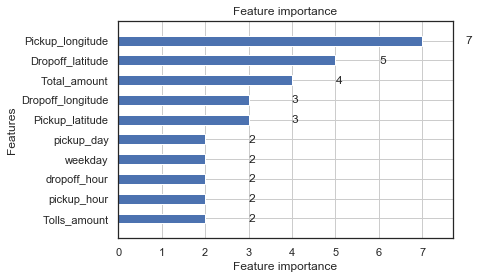

In [180]:
var = lgb.plot_importance(model, max_num_features=10, height = 0.5)
plt.show()

## Question 5

Option A: Distributions

Build a derived variable representing the average speed over the course of a trip.

Can you perform a test to determine if the average trip speeds are materially the same in all weeks of September? If you decide they are not the same, can you form a hypothesis regarding why they differ?

Can you build up a hypothesis of average trip speed as a function of time of day?

In [185]:
# create the variable trip_time
d['Trip_time'] = (d['dropoff'] - d['pickup']).apply(lambda x: x.total_seconds())

In [186]:
# filter out instances having trip_time less than one minute.
d = d[d['Trip_time']>60]

In [188]:
# compute average speed (miles per hour)
d['speed'] = 3600*(d['Trip_distance']/d['Trip_time'])

In [193]:
# we filter out records having >=120 miles per hour since this may be data errors and  affect our analysis.
d = d[d['speed']<120]

In [194]:
# derive the week
d['week'] = d['dropoff'].apply(lambda x : x.week)

In [195]:
d['week'].value_counts()

37    350322
38    346848
39    326536
36    286617
40    128155
Name: week, dtype: int64

In [196]:
d[['speed','week']].groupby('week').mean()

,speed
week,
36,13.104057
37,12.460126
38,12.468493
39,12.916837
40,12.222730


#### Let's build a boxplot to see if there are any visual differences across weeks.

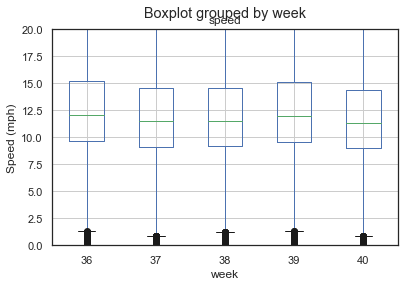

In [199]:
d.boxplot('speed','week')
plt.ylim([0,20]) # cut off outliers
plt.ylabel('Speed (mph)')
plt.show()

We do not see any significant visual differences. However, I will run pairwise t-sudent test to check this in a more rigurous way.

In [250]:
#one-way anova
scipy.stats.f_oneway(d['speed'][d['week']==36],d['speed'][d['week']==37],d['speed'][d['week']==38],d['speed'][d['week']==39], d['speed'][d['week']==40])


F_onewayResult(statistic=1092.047375861616, pvalue=0.0)

The ANOVa test indicates that we reject the null hypothesis and conclude that the differences between the groups are statistically significant, i.e, the week of the month seems to be related to the trip speed. 

#### Does the speed change over the course of the day? 
We use one-way anova test on multiple samples. 

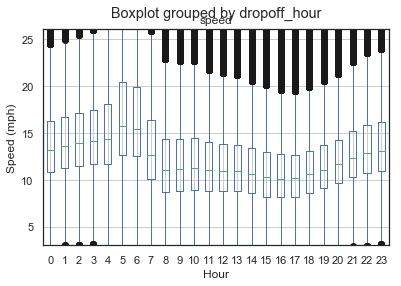

In [220]:
d.boxplot('speed','dropoff_hour')
plt.ylim([3,26])
plt.ylabel('Speed (mph)')
plt.xlabel('Hour')
plt.show()

We observe that trips are faster early morning (4-6 am) and gets slow in peak hours (4-6 pm). I conjecture that this happen due to less traffic during the early morning.

In [224]:
# perform anova test
hours = range(24)
cmd = "scipy.stats.f_oneway("
for h in hours:
    cmd+="d[d.dropoff_hour=="+str(h)+"].speed,"
cmd=cmd[:-1]+")"
print ("one way anova test:", eval(cmd)) #evaluate the command and print

one way anova test: F_onewayResult(statistic=4992.414804189994, pvalue=0.0)


As suggested by the one-way anova test, the speed is different in different hours (pvalue=0).

# Findings

#### 1. We notice that the trip_distance follows a lognormal distribution
#### 2. We observe longer trips early morning (4-7 am) and then again at 10-11 pm.
#### 3. We could build a predictive model with a good performance to predict tip_percentage. RMSE was about 0.078.
#### 4. We  observe statistically sifgnificant differences in travel speed over the weeks of September 2015.
#### 5. We do note differenses in travel speed over the course of the day: trips in the early morning (4-6 am) are faster than those taking place during peak hours.